In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandasql import sqldf
from scipy import stats

In [3]:
dataset = pd.read_csv("dataset_SCL.csv",dtype="str")
for col in dataset.columns:
    dataset[col] = pd.to_numeric(dataset[col], errors='ignore')
dataset['Fecha-I'] = pd.to_datetime(dataset['Fecha-I'])
dataset['Fecha-O'] = pd.to_datetime(dataset['Fecha-O'])

The following cell creates the extra columns and the csv file requested on the Point 2

In [4]:
def populate_high_season(date):
    if pd.to_datetime(str(date.year) + '-1-1') <= date < pd.to_datetime(str(date.year) + '-3-4'):
        return 1
    elif pd.to_datetime(str(date.year) + '-7-15') <= date < pd.to_datetime(str(date.year) + '-8-1'):
        return 1
    elif pd.to_datetime(str(date.year) + '-9-11') <= date < pd.to_datetime(str(date.year) + '-10-1'):
        return 1
    elif pd.to_datetime(str(date.year) + '-12-15') <= date:
        return 1
    else:
        return 0
dataset['high_season'] = dataset['Fecha-I'].apply(populate_high_season)

dataset['min_diff'] = (dataset['Fecha-O'] - dataset['Fecha-I']).dt.total_seconds()/60

dataset['delay_15'] = dataset['min_diff'].apply(lambda x: 1 if x > 15 else 0)

per_day_lambda = lambda x: 'night' if 0<=x<=4 else 'morning' if 5<=x<=11 else 'afternoon' if 12<=x<=18 else 'night' if 19<=x<=23 else 'n/a'
dataset['period_day'] = dataset['Fecha-I'].dt.hour.apply(per_day_lambda)
dataset.to_csv('synthetic_features.csv', index=False)

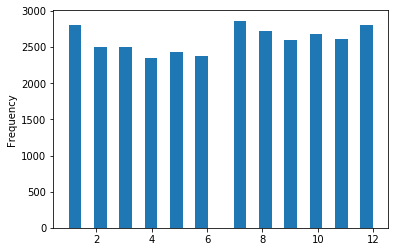

In [5]:
dataset[dataset['TIPOVUELO']=='I']['MES'].plot.hist(bins = 24)

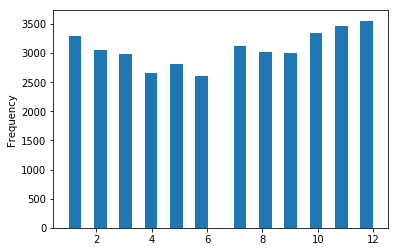

In [6]:
dataset[dataset['TIPOVUELO']=='N']['MES'].plot.hist(bins = 24)

In [7]:
q1 = "SELECT count(*) from dataset"
sqldf(q1,globals())

,count(*)
0,68206


In [8]:
q2 = "SELECT TIPOVUELO, count(TIPOVUELO)*100.00/(SELECT count(*) from dataset) FROM dataset GROUP BY TIPOVUELO"
sqldf(q2,globals())

,TIPOVUELO,count(TIPOVUELO)*100.00/(SELECT count(*) from dataset)
0,I,45.802422
1,N,54.197578


In [9]:
q3 = "SELECT TIPOVUELO, count(TIPOVUELO) FROM dataset GROUP BY TIPOVUELO"
sqldf(q3,globals())

,TIPOVUELO,count(TIPOVUELO)
0,I,31240
1,N,36966


In [10]:
q4 = "SELECT OPERA, TIPOVUELO, count(TIPOVUELO) as COUNT_VUELO, count(TIPOVUELO)*100.00/(SELECT COUNT(*) FROM dataset WHERE TIPOVUELO = 'I') AS PERC_VUELO FROM dataset WHERE TIPOVUELO = 'I' GROUP BY OPERA, TIPOVUELO ORDER BY COUNT(TIPOVUELO) DESC"
sqldf(q4,globals())

,OPERA,TIPOVUELO,COUNT_VUELO,PERC_VUELO
0,Grupo LATAM,I,17149,54.894366
1,Sky Airline,I,2800,8.962868
2,Aerolineas Argentinas,I,1949,6.238796
3,Copa Air,I,1850,5.921895
4,Avianca,I,1152,3.687580
5,Latin American Wings,I,1038,3.322663
6,Gol Trans,I,806,2.580026
7,American Airlines,I,757,2.423175
8,Air Canada,I,565,1.808579
9,Iberia,I,362,1.158771


In [11]:
q5 = "SELECT SIGLADES, COUNT(SIGLADES) FROM dataset WHERE TIPOVUELO = 'I' GROUP BY SIGLADES ORDER BY COUNT(SIGLADES) DESC"
sqldf(q5,globals())

,SIGLADES,COUNT(SIGLADES)
0,Buenos Aires,6335
1,Lima,5270
2,Sao Paulo,3569
3,Ciudad de Panama,1850
4,Mendoza,1625
5,Bogota,1604
6,Rio de Janeiro,1435
7,Montevideo,1066
8,Cordoba,1023
9,Miami,1016


In [12]:
q6 = "SELECT SIGLADES, OPERA, COUNT(SIGLADES) FROM dataset WHERE TIPOVUELO = 'I' and SIGLADES IN ('Buenos Aires', 'Lima', 'Sao Paulo', 'Ciudad de Panama', 'Mendoza') GROUP BY SIGLADES, OPERA ORDER BY SIGLADES, COUNT(SIGLADES) DESC"
sqldf(q6,globals())

,SIGLADES,OPERA,COUNT(SIGLADES)
0,Buenos Aires,Grupo LATAM,2924
1,Buenos Aires,Aerolineas Argentinas,1949
2,Buenos Aires,Sky Airline,899
3,Buenos Aires,Air Canada,282
4,Buenos Aires,K.L.M.,251
5,Buenos Aires,Austral,30
6,Ciudad de Panama,Copa Air,1850
7,Lima,Grupo LATAM,3189
8,Lima,Sky Airline,894
9,Lima,Latin American Wings,819


In [14]:
q7 = "SELECT DIANOM, COUNT(DIANOM) FROM dataset GROUP BY DIANOM ORDER BY COUNT(DIANOM) DESC"
sqldf(q7,globals())

,DIANOM,COUNT(DIANOM)
0,Viernes,10292
1,Jueves,10251
2,Lunes,10131
3,Domingo,9796
4,Miercoles,9722
5,Martes,9662
6,Sabado,8352


In [13]:
q8 = "SELECT DIANOM, TIPOVUELO, COUNT(DIANOM) FROM dataset GROUP BY DIANOM, TIPOVUELO ORDER BY TIPOVUELO, COUNT(DIANOM) DESC"
sqldf(q8,globals())

,DIANOM,TIPOVUELO,COUNT(DIANOM)
0,Domingo,I,4547
1,Viernes,I,4518
2,Lunes,I,4492
3,Sabado,I,4491
4,Jueves,I,4440
5,Miercoles,I,4419
6,Martes,I,4333
7,Jueves,N,5811
8,Viernes,N,5774
9,Lunes,N,5639


In [15]:
q9 = "SELECT strftime('%H', [Fecha-I]), count(*) from dataset where TIPOVUELO = 'N' group by strftime('%H', [Fecha-I])"
sqldf(q9,globals())

,"strftime('%H',",count(*)
0,00,1082
1,01,1573
2,02,641
3,03,505
4,04,1092
5,05,2514
6,06,4199
7,07,4882
8,08,4363
9,09,3264


The data shows the list of the 2017 flights taking off in the Santiago de Chile airport. The 68,206 flights have a distribution of 45.8% International flights and 54.2% National flights. The seasonality in the national flights is stronger than in the international ones, being summer months the ones with the most flights. As far as days in the week go, Saturday was the one that saw fewer flights, due to the fewer amount of national flights, as the amount of international flights was consistent throught the days.
From the 31,240 international flights, Grupo LATAM has the biggest market share operating 54.9% of them, followed by Sky Airline, with a 9.0%, and Aerolineas Argentinas and Copa Air with around 6% each. The most popular destinations (number of flights-wise) are Buenos Aires, Lima, Sao Paulo, Ciudad de Panama and Mendoza. From them, Ciudad de Panama is the only destination that is only offered by one operator (Copa Air), with a total of 1850 flights during the year.
Based on the data it is possible to say that most of the airport traffic is generated by Grupo LATAM and Sky Airline. It's also possible to say that the highest traffic for the national flights occurs during the morning and in the afternoon, while the nights are mostly quiet. It's worth noting that this pattern also applies to the international flights, which could be explained by the most popular destinations being a comparable distance/timezone to national flights.

In [10]:
print(dataset[(dataset['TIPOVUELO']=='N')&(dataset['min_diff']>0)]['min_diff'].count()*100.00/dataset[dataset['TIPOVUELO']=='N']['min_diff'].count(), '% of National flights get delayed, and a ',dataset[dataset['TIPOVUELO']=='N']['delay_15'].sum()*100.00 / dataset[dataset['TIPOVUELO']=='N']['delay_15'].count(),'% does it in more than 15 minutes')
print(dataset[(dataset['TIPOVUELO']=='I')&(dataset['min_diff']>0)]['min_diff'].count()*100.00/dataset[dataset['TIPOVUELO']=='I']['min_diff'].count(), '% of International flights get delayed, and a ',dataset[dataset['TIPOVUELO']=='I']['delay_15'].sum()*100.00 / dataset[dataset['TIPOVUELO']=='I']['delay_15'].count(),'% does it in more than 15 minutes')


65.76313369041823 % of National flights get delayed, and a  15.057079478439647 % does it in more than 15 minutes
67.85211267605634 % of International flights get delayed, and a  22.56081946222791 % does it in more than 15 minutes


Text(0.5, 1.0, 'International Delays')

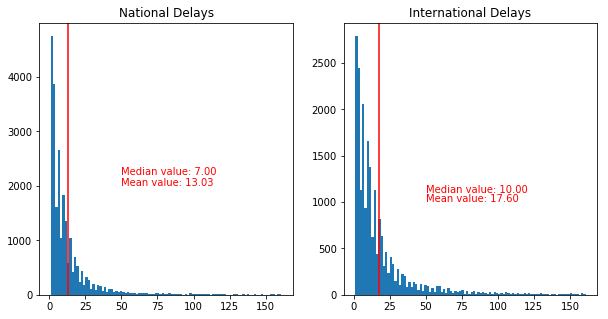

In [7]:
data_nac = dataset[(dataset['TIPOVUELO']=='N') & (dataset['min_diff'] > 0)]['min_diff']
data_int = dataset[(dataset['TIPOVUELO']=='I') & (dataset['min_diff'] > 0)]['min_diff']
fig, (char_1, char_2) = plt.subplots(1,2, figsize=(10,5))
char_1.hist(data_nac, bins = 100)
char_1.axvline(x = data_nac.mean(), color='r')
char_1.text(50, 2000, 'Mean value: {:.2f}'.format(data_nac.mean()), color='r')
char_1.text(50, 2200, 'Median value: {:.2f}'.format(data_nac.median()), color='r')
char_1.set_title('National Delays')

char_2.hist(data_int, bins = 100)
char_2.axvline(x = data_int.mean(), color='r')
char_2.text(50, 1000, 'Mean value: {:.2f}'.format(data_int.mean()), color='r')
char_2.text(50, 1100, 'Median value: {:.2f}'.format(data_int.median()), color='r')
char_2.set_title('International Delays')

In [11]:
dataset.groupby('OPERA')['min_diff'].describe()

,count,mean,std,min,25%,50%,75%,max
OPERA,,,,,,,,
Aerolineas Argentinas,1949.0,10.004618,22.604230,-14.0,-3.0,3.0,15.00,154.0
Aeromexico,351.0,-2.495726,10.799437,-14.0,-8.0,-4.0,0.00,138.0
Air Canada,565.0,22.909735,30.628997,-14.0,2.0,13.0,33.00,152.0
Air France,358.0,1.399441,10.527260,-14.0,-5.0,-1.0,5.00,70.0
Alitalia,259.0,5.293436,15.932233,-14.0,-3.0,2.0,10.00,151.0
American Airlines,757.0,0.277411,16.445667,-14.0,-7.0,-3.0,1.00,160.0
Austral,74.0,6.608108,13.734087,-14.0,-3.0,4.5,12.50,47.0
Avianca,1152.0,11.131944,25.043905,-14.0,-3.0,2.5,17.00,159.0
British Airways,205.0,7.560976,19.241561,-11.0,-2.0,2.0,7.00,124.0


In [13]:
dataset[dataset['TIPOVUELO']=='N'].groupby('SIGLADES')['min_diff'].describe()

,count,mean,std,min,25%,50%,75%,max
SIGLADES,,,,,,,,
Antofagasta,5786.0,7.024542,16.507155,-13.0,-1.00,2.0,9.0,161.0
Arica,2436.0,7.143678,16.562739,-13.0,-1.00,3.0,9.0,159.0
Balmaceda,839.0,8.990465,17.403533,-8.0,0.00,4.0,11.0,147.0
Calama,5146.0,5.968908,15.251535,-14.0,-1.00,2.0,7.0,161.0
Castro (Chiloe),235.0,6.212766,18.667738,-5.0,-1.00,2.0,6.0,145.0
Concepcion,3993.0,8.329326,19.691559,-14.0,-1.00,3.0,10.0,161.0
Copiapo,1780.0,7.154494,16.044635,-14.0,-1.00,3.0,9.0,148.0
Iquique,3747.0,8.625567,16.959577,-14.0,0.00,4.0,11.0,157.0
Isla de Pascua,452.0,11.617257,19.854392,-8.0,2.75,6.0,13.0,156.0


In [14]:
dataset.groupby('DIANOM')['min_diff'].describe()

,count,mean,std,min,25%,50%,75%,max
DIANOM,,,,,,,,
Domingo,9796.0,7.930788,17.825904,-14.0,-1.0,3.0,11.0,161.0
Jueves,10251.0,9.521120,18.789608,-14.0,0.0,4.0,13.0,161.0
Lunes,10131.0,9.980653,20.645717,-14.0,-1.0,4.0,13.0,161.0
Martes,9662.0,8.324777,18.846261,-14.0,-1.0,3.0,11.0,161.0
Miercoles,9722.0,8.540835,18.570424,-14.0,-1.0,3.0,11.0,160.0
Sabado,8352.0,8.315014,19.830023,-14.0,-1.0,3.0,10.0,160.0
Viernes,10292.0,10.891469,20.331720,-14.0,0.0,5.0,14.0,161.0


In [15]:
dataset[dataset['TIPOVUELO']=='N'].groupby('MES')['min_diff'].describe()

,count,mean,std,min,25%,50%,75%,max
MES,,,,,,,,
1,3303.0,5.181048,12.556640,-12.0,-1.0,2.0,7.0,154.0
2,3062.0,6.116264,14.558903,-14.0,-1.0,3.0,8.0,157.0
3,2986.0,4.460147,14.683800,-14.0,-2.0,1.0,6.0,159.0
4,2666.0,4.801950,13.820254,-14.0,-1.0,1.0,6.0,161.0
5,2812.0,6.411807,14.965692,-12.0,-1.0,2.0,8.0,161.0
6,2608.0,7.800613,19.010246,-12.0,-1.0,2.0,9.0,161.0
7,3127.0,14.548769,24.676125,-14.0,1.0,6.0,16.5,161.0
8,3025.0,6.470744,15.505990,-14.0,-1.0,2.0,8.0,152.0
9,3005.0,6.913478,15.417660,-13.0,-1.0,3.0,9.0,155.0


In [16]:
dataset[dataset['TIPOVUELO']=='I'].groupby('MES')['min_diff'].describe()

,count,mean,std,min,25%,50%,75%,max
MES,,,,,,,,
1,2805.0,10.817825,20.131858,-14.0,0.0,6.0,15.0,161.0
2,2499.0,9.279712,20.414318,-14.0,-1.0,4.0,13.0,160.0
3,2496.0,7.308894,18.874470,-14.0,-2.0,3.0,11.0,161.0
4,2354.0,6.873832,16.409516,-14.0,-2.0,3.0,10.0,148.0
5,2428.0,8.807249,18.855574,-14.0,-1.0,4.0,12.0,153.0
6,2373.0,9.357775,19.873602,-14.0,-1.0,4.0,13.0,161.0
7,2865.0,16.270855,26.259328,-14.0,1.0,8.0,20.0,159.0
8,2719.0,11.004413,22.085974,-14.0,-1.0,4.0,14.0,161.0
9,2605.0,10.324376,22.385319,-14.0,-1.0,4.0,13.0,159.0


The percentage of international flights that get delayed is a little higher than the national counterpart. But if instead of just delays we look into the delays of more than 15 minutes, the difference increases. This is also shown in the charts, where the delays of the international flights have a median of 10 minutes versus 7 of the national flights.
Operator-wise, there are also differences. Some airlines start more than 75% of their flights in time (like Aeromexico and United Airlines), while others dont even reach the 25% (Plus Ultra Lineas Aereas and Qantas Airways)
In the National destinations, the averages of the delays are slightly higher on the southern destinations, and considerably higher for Isla de Pascua. On the International ones, the destinations that present the longest delays are located in Australia, which might be due to an airline factor rather than a destination.
The day of the week doesn't seem to affect the delays a lot, but there may be a correlation between the amount of flights and the delays generated. If we look at months, July is the one that presents the longest delays, followed by December (the difference between july and december is higher in the national flights, so the december delays might be related to the weather conditions of the destinations).

In [17]:
DIANOM_dic = {'Lunes' : 1,
              'Martes' : 2,
              'Miercoles' :3,
              'Jueves' : 4,
              'Viernes' : 5,
              'Sabado' : 6,
              'Domingo' : 7}

TIPOVUELO_dic = {'I' : 1,
                 'N' : 0}

period_day_dic = {'morning' : 1,
                  'afternoon' : 2,
                  'night' : 3}

distinct_opera = dataset['OPERA'].drop_duplicates().reset_index(drop=True)
distinct_opera = distinct_opera.reset_index()
distinct_dest = dataset['SIGLADES'].drop_duplicates().reset_index(drop=True)
distinct_dest = distinct_dest.reset_index()

small_df = dataset[['MES', 'DIANOM', 'TIPOVUELO', 'OPERA', 'SIGLADES', 'high_season', 'period_day', 'min_diff']]
small_df['DIANOM'] = small_df['DIANOM'].replace(DIANOM_dic)
small_df['TIPOVUELO'] = small_df['TIPOVUELO'].replace(TIPOVUELO_dic)
small_df['period_day'] = small_df['period_day'].replace(period_day_dic)

for index, row in distinct_opera.iterrows():
    small_df['OPERA'] = small_df['OPERA'].replace(row['OPERA'], row['index'])

for index, row in distinct_dest.iterrows():
    small_df['SIGLADES'] = small_df['SIGLADES'].replace(row['SIGLADES'], row['index'])

C:\Users\Yuriy\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Yuriy\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Yuriy\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi